# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

# Comparison between the types

In [6]:
# General
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")
# Age
GF_SPF_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
GF_SPF_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,1), alpha=0.05, test="Wald")
GF_SPF_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1,0), alpha=0.05, test="Wald")
# Gender
GF_SPF_F = results(dge,contrast= c(0,0,1,0,0,0,0,0,1/3,1/3), alpha=0.05, test="Wald")
GF_SPF_M = results(dge,contrast= c(0,0,1,0,0,0,0,1,1/3,1/3), alpha=0.05, test="Wald")
# Age and gender
GF_SPF_F_8w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
GF_SPF_M_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
GF_SPF_F_52w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,1), alpha=0.05, test="Wald")
GF_SPF_M_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,1), alpha=0.05, test="Wald")
GF_SPF_F_104w = results(dge,contrast= c(0,0,1,0,0,0,0,0,1,0), alpha=0.05, test="Wald")
GF_SPF_M_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1,1,0), alpha=0.05, test="Wald")
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")

In [7]:
stats = matrix(0, nrow=12, ncol=3)
rownames(stats) = c("GF VS SPF",
                    "GF VS SPF (8w)","GF VS SPF (52w)","GF VS SPF (104w)",
                    "GF VS SPF (F)", "GF VS SPF (M)",
                    "GF VS SPF (F, 8w)","GF VS SPF (M, 8w)","GF VS SPF (F, 52w)","GF VS SPF (M, 52w)","GF VS SPF (F, 104w)","GF VS SPF (M, 104w)")
colnames(stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
stats[1,] = get_stats_padj(GF_SPF)
stats[2,] = get_stats_padj(GF_SPF_8w)
stats[3,] = get_stats_padj(GF_SPF_52w)
stats[4,] = get_stats_padj(GF_SPF_104w)
stats[5,] = get_stats_padj(GF_SPF_F)
stats[6,] = get_stats_padj(GF_SPF_M)
stats[7,] = get_stats_padj(GF_SPF_F_8w)
stats[8,] = get_stats_padj(GF_SPF_M_8w)
stats[9,] = get_stats_padj(GF_SPF_F_52w)
stats[10,] = get_stats_padj(GF_SPF_M_52w)
stats[11,] = get_stats_padj(GF_SPF_F_104w)
stats[12,] = get_stats_padj(GF_SPF_M_104w)
stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
GF VS SPF,2561,1063,1498
GF VS SPF (8w),337,180,157
GF VS SPF (52w),779,310,469
GF VS SPF (104w),2622,1122,1500
GF VS SPF (F),1676,685,991
GF VS SPF (M),944,382,562
"GF VS SPF (F, 8w)",392,192,200
"GF VS SPF (M, 8w)",161,76,85
"GF VS SPF (F, 52w)",738,316,422
"GF VS SPF (M, 52w)",393,145,248


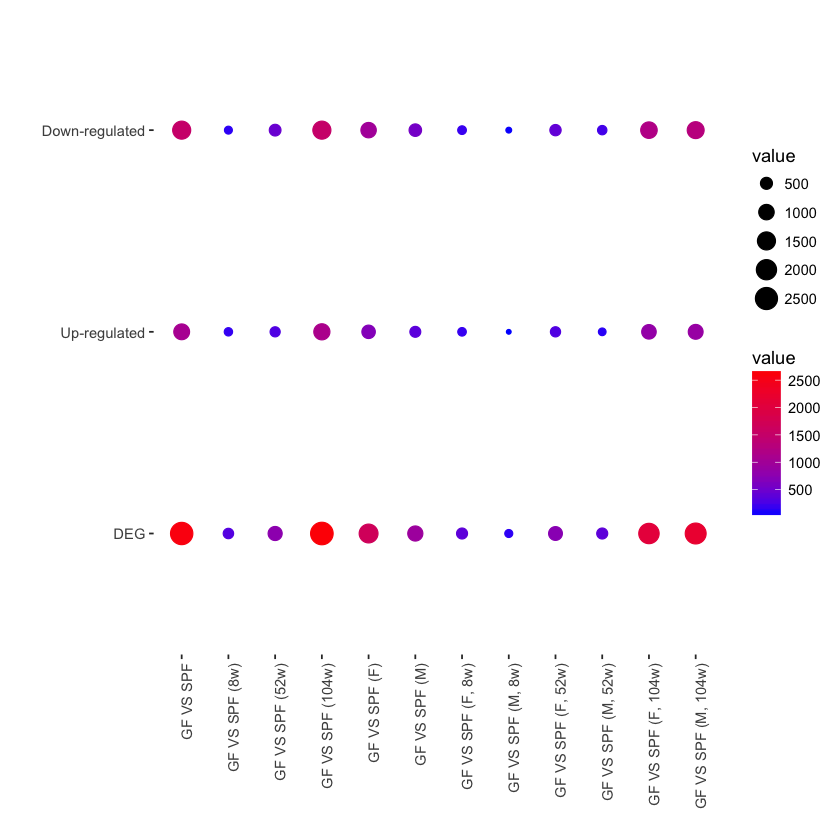

In [8]:
plot_stat_mat(stats)

In [36]:
mat = as.data.frame(stats)
colnames(mat) = c("DEG","PDEG","NDEG")
mat$age = factor(c("2/12/24mo","2mo","12mo","24mo","2/12/24mo","2/12/24mo","2mo","2mo","12mo","12mo","24mo","24mo"),
                 levels = c("2mo", "12mo", "24mo","2/12/24mo"))
mat$gender = factor(c(rep("F/M",4),rep(c("F","M"),4)),
                    levels = c("F/M", "M","F"))
mat

,DEG,PDEG,NDEG,age,gender
GF VS SPF,2561,1063,1498,2/12/24mo,F/M
GF VS SPF (8w),337,180,157,2mo,F/M
GF VS SPF (52w),779,310,469,12mo,F/M
GF VS SPF (104w),2622,1122,1500,24mo,F/M
GF VS SPF (F),1676,685,991,2/12/24mo,F
GF VS SPF (M),944,382,562,2/12/24mo,M
"GF VS SPF (F, 8w)",392,192,200,2mo,F
"GF VS SPF (M, 8w)",161,76,85,2mo,M
"GF VS SPF (F, 52w)",738,316,422,12mo,F
"GF VS SPF (M, 52w)",393,145,248,12mo,M


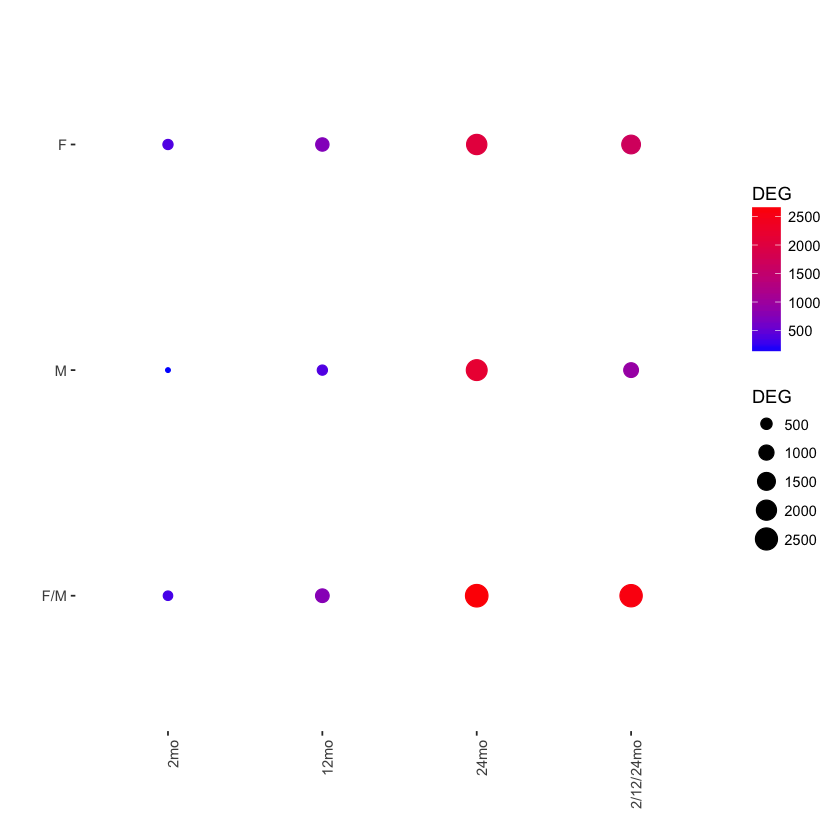

In [37]:
p = ggplot(mat, aes(factor(age), factor(gender))) +
    labs(x = "", y = "") +
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.y = element_text(size = rel(1.8)), panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +        
    geom_point(aes(size=DEG,col=DEG)) + 
    scale_colour_gradient(low = "blue", high="red")
p